## CStree from (Duarte & Solus, 2022)

In [26]:
import networkx as nx
import numpy as np

import cstrees.cstree as ct
import cstrees.stage as st

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create the CStree

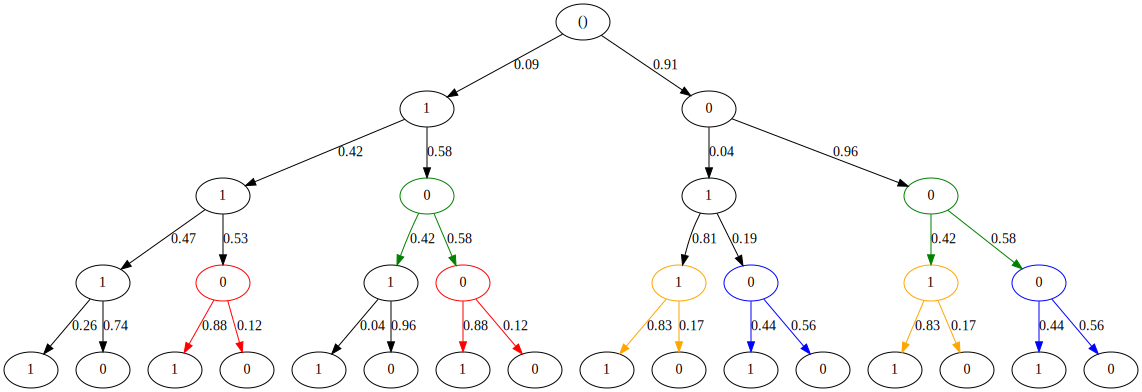

In [27]:
np.random.seed(2)

tree = ct.CStree([2, 2, 2, 2])

tree.update_stages({
    0: [st.Stage([0]), st.Stage([1])],
    1: [st.Stage([{0, 1}, 0], color="green"), st.Stage([0, 1]), st.Stage([1, 1])],
    2: [st.Stage([0, {0, 1}, 0], color="blue"),
        st.Stage([0, {0, 1}, 1], color="orange"),
        st.Stage([1, {0, 1}, 0], color="red"),
        st.Stage([1, 1, 1]),
        st.Stage([1, 0, 1])]
})

tree.sample_stage_parameters(alpha=1)
tree.plot()

### The CSI relations

In [28]:
rels = tree.csi_relations()
for cont, rels in rels.items():
    for rel in rels:
        print(rel)

X0 ⊥ X2, X1=0
X1 ⊥ X3, X0=0, X2=0
X1 ⊥ X3, X0=0, X2=1
X1 ⊥ X3, X0=1, X2=0


### The minimal context CSI relations

In [29]:
minl_csis = tree.to_minimal_context_csis()
for cont, csis in minl_csis.items():
    for csi in csis:
        print(csi)

X0 ⊥ X2, X1=0
X1 ⊥ X3, X2=0
X1 ⊥ X3 | X2, X0=0


### The minimal context DAGs

In [30]:
gs = tree.to_minimal_context_graphs()
# Convert to Graphviz graphs for plotting
agraphs = {}
keys = list(gs.keys())
for key, graph in gs.items():
    agraphs[key] = nx.nx_agraph.to_agraph(graph)
    agraphs[key].layout("dot")

X1=0


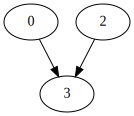

In [31]:
print(keys[0])
agraphs[keys[0]]

X2=0


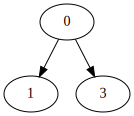

In [32]:
print(keys[1])
agraphs[keys[1]]

X0=0


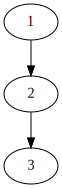

In [33]:
print(keys[2])
agraphs[keys[2]]

### Sampling data

In [34]:
df = tree.sample(10)
df

,0,1,2,3
0,2,2,2,2
1,0,0,1,1
2,0,0,0,0
3,0,0,0,1
4,0,0,1,1
5,0,0,0,1
6,0,0,0,0
7,0,1,1,1
8,0,1,1,1
9,0,0,1,1


### Write the CStree structure to a Pandas dataframe

In [35]:
treedf = tree.to_df()
treedf

,0,1,2,3
0,2,2,2,2
1,0,-,-,-
2,1,-,-,-
3,*,0,-,-
4,0,1,-,-
5,1,1,-,-
6,0,*,0,-
7,0,*,1,-
8,1,*,0,-
9,1,1,1,-


### Read CStree from a Pandas dataframe

In [36]:
t = ct.df_to_cstree(treedf)
t.to_df()

,0,1,2,3
0,2,2,2,2
1,0,-,-,-
2,1,-,-,-
3,*,0,-,-
4,0,1,-,-
5,1,1,-,-
6,0,*,0,-
7,0,*,1,-
8,1,*,0,-
9,1,1,1,-
